<a href="https://colab.research.google.com/github/Melinnaaa/ADA-Informes/blob/main/Informe8_BST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Problema: Árbol binario de búsqueda óptimo**


Entrada: Secuencia ordenada de n claves: $K=\left<k_1,k_2,...,k_n\right>$. Cada clave $k_i$ tiene una probabilidad $p_i$ de ser buscada. Existen claves ficticias $d_i$ que representan búsquedas fallidas con $k_{i-1} \leq d_i \leq k_i$. Cada clave $d_i$ tiene una probabilidad $q_i$ de ser buscada. La suma de probabilidades debe ser uno, es decir: $\sum\limits_{i=1}^n p_i + \sum\limits_{j=0}^n q_i = 1$

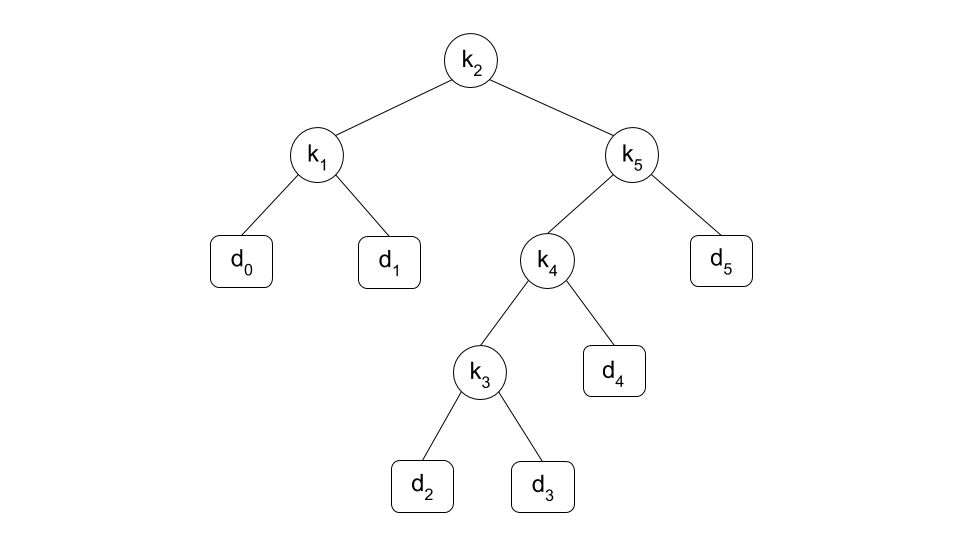

El problema que se abordará en este informe es el **árbol de busqueda óptimo**, el cual busca minimizar la cantidad promedio de nodos visitados al realizar una búsqueda. Este algoritmo se explicará en mas profundidad a lo largo del informe.

Para esto se utilizará la programación dinámica, el cual es una solución para los problemas que deben resolver el mismo subproblema repetidas veces, como puede ser la serie de fibonacci recursiva. En este caso, la programación dinámica resuelve cada subproblema una vez y lo almacena en una tabla, de esta manera evitando el trabajo redudante.

# **2. Árbol binario de busqueda óptimo**

## 2.1 Código

El siguiente código muestra una implementación del algoritmo **OBST.**

### Impresora de matrices

In [6]:
import math
def matprint(mat, fmt="g"):
  col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
  for x in mat:
      for i, y in enumerate(x):
          print(("{:"+str(math.trunc(col_maxes[i]))+fmt+"}").format(y), end="  ")
      print("")
  

### Árbol binario de busqueda óptimo *Recursivo*


In [123]:
import math
from termcolor import colored

# Encuentra el costo óptimo
def optCost(p, q, i, j, cont, verbose = False):
  
  # Contador de llamadas recursivas
  cont[0] += 1

  # caso base
  if j < i: 
    return q[i - 1]
    
  # Se obtiene la suma se las frecuencias/probabilidades desde i hasta j
  s = sum(p[i - 1:j]) + sum(q[i - 1:j+1])

  # Se inicializa en un valor máximo para la primera comprobación
  m = math.inf
    
  for r in range(i, j + 1):
    # La el costo  del subárbol es la suma del izquierdo, el derecho y la suma de probabilidades
    cost = (optCost(p, q, i, r - 1, cont, verbose) + optCost(p, q, r + 1, j, cont, verbose) + s)
  
    if (verbose == True):
      print("La suma de las probabilidades es: ", colored(round(s, 2), 'blue'))
      print(f"El costo del arbol de raiz {r} es: {colored(round(cost, 2), 'green')}")
    # Si el costo obtenido es menor se actualiza
    if cost < m:
      if (verbose == True):
        print(f"El costo del arbol {round(cost,2)} < {round(m,2)}, se actualiza el costo optimo")
        print("El costo optimo es:", colored(round(cost, 2), 'magenta'))
        print("\n")
      m = cost
    else:
      if (verbose == True):
        print(f"El costo del arbol {round(cost,2)} >= {round(m,2)}, se mantiene el costo optimo")
        print("El costo optimo es:", colored(round(m, 2), 'magenta'))
        print("\n")

  # Retorna el valor minimo mas la suma de probabilidades
  return m

def recursiveOBST(p, q, n, cont, verbose = False):
  c = optCost(p, q, 1, n, cont, verbose)
  if verbose == True:
    print("El costo óptimo es: ", colored(round(c, 2), 'red'))
  return c

cont = [0]
k = [1, 2, 3, 4, 5, 6, 7]
p = [0.04, 0.06, 0.08, 0.02, 0.10, 0.12, 0.14]
q = [0.06, 0.06, 0.06, 0.06, 0.05, 0.05, 0.05, 0.05]
n = len(k)

print("EL costo óptimo es:", recursiveOBST(p, q, len(k), cont))
print("Cantidad de llamadas recursivas:", cont[0])

EL costo óptimo es: 3.12
Cantidad de llamadas recursivas: 2187



### Árbol binario de busqueda óptimo *Dinámico*

In [8]:
import math
import numpy as np

# Árbol óptimo dinámico.
# p es la probabilidad de las claves reales
# q son las claves ficticias (dummy)
# n es el largo del arreglo
# cont es el contador de subproblemas

def dynamicBst(p, q, n, cont, verbose = False): 
  # subarbol óptimo
  e = np.zeros((n+2, n+1))

  # suma de probabilidades
  w = np.zeros(shape=(n+2,n+1))

  # se utiliza para construir el árbol
  root = np.zeros((n+1, n+1), dtype = int)

  # Se almacenan las probabilidades
  for i in range(1, n+2):
    e[i][i-1] = q[i-1]
    w[i][i-1] = q[i-1]
      
  for l in range(1, n + 1):
    for i in range(1, n - l + 2):
      # Aumenta el contador de subproblemas
      cont[0] += 1
      j = i + l - 1
      # Se le asigna un número grande para la primera comparación
      e[i][j]= math.inf
      # Suma de probabilidades
      w[i][j] = w[i][j-1] + p[j - 1] + q[j]
      if (verbose == True):
        print(f"Calculando datos para el subarbol {colored(i, 'green')}...{colored(j, 'green')}: ")
      if verbose == True:
        print(f"La suma de probabilidades de w[{i}][{j}] es: {colored(round(w[i][j], 2), 'green')}")
      
      for k in range (i, j + 1):
        # El costo óptimo para la raiz k
        t = e[i][k-1] + e[k + 1][j] + w[i][j]
        # Si este es menor
        if (t < e[i][j]):
          e[i][j] = t
          root[i][j] = k
      if (verbose == True):
        print(f"El costo mínimo del arbol de raiz e[{i}][{j}] es: {colored(round(e[i][j], 2), 'magenta')}\n")

  if (verbose == True):
    print("El costo mínimo del arbol es:",colored(round(e[1][n], 2), 'blue'))
    print("La matriz de costos w es: ")
    print(np.array2string(e, formatter={'float_kind': '{0:.2f}'.format}))
    print("\nLa matriz de probabilidades e es: ")
    print(np.array2string(w, formatter={'float_kind': '{0:.2f}'.format}))

  return (e[1][n], root)

k = [1, 2, 3, 4, 5]
p = [0.15, 0.10, 0.05, 0.10, 0.20]
q = [0.05, 0.10, 0.05, 0.05, 0.05, 0.10]
n = len(k)
cont = [0]
q, root = dynamicBst(p, q, n, cont)
print("Costo mínimo:", q)
print("Cantidad de subproblemas resueltos:", cont[0])

#tree = construct_optimal_bst(root, k, 1, n)

Costo mínimo: 2.75
Cantidad de subproblemas resueltos: 15


## 2.2. Descripción del algoritmo

Ambos algoritmos reciben los mismos parametros de entrada:

$p$ : Probabilidad de claves reales

$q$ : Probabilidad de claves ficticias

$n$ : Largo del arreglo de llaves

$cont$ : Contador de subproblemas(dinámico)/ Contador de llamadas recursivas.

$verbose$ : Variable para poder visualizar el algoritmo paso a paso

### Árbol de busqueda óptimo **Dinámico**

1. Se crean tres matrices, $e$, la cual almacena el subarbol óptimo, $w$ que almacena la suma de las probabilidades y $root$ que es utilizada para construir el árbol. 

2. Se inicializan las matrices $e$ y $w$ con los valores correspondientes a la probabilidad de las claves fallidas.

3. Se calcula la suma de probabilidades y se almacena en la matriz $w$. 

4. Se calcula el costo óptimo del árbol con raíz $k$.

5. Se guarda el costo óptimo en la matriz $e$ y se guarda la raíz que minimiza el costo en $root$.

6. Al finalizar se retorna el costo óptimo $e[1][n]$ y la matriz de raices $root$.


### Árbol de busqueda óptimo **Recursivo**

1. Se calcula la suma de las probabilidades reales y ficticias, y el resultado se almacena en la variable $s$.

2. La varbiable $m$ que almacena el costo mínimo se inicializa en un valor máximo para que siempre se actualice en la primera comprobación.

3. Se recorren todas las raices y se calcula la suma del subarbol izquierdo más el derecho, con esto nos queda el costo esperado del subárbol, este valor se almacena en la variable $cost$.

4. Si el costo del subárbol es menor al costo mínimo $m$, se actualiza $m$ con el costo del arbol.

5. Se retorna el costo óptimo.

## 2.3. Ejemplo


$k = [1,2]$

$p = [0.2, 0.3]$

$q = [0.1, 0.1, 0.3]$

Primero se inicializa la diagonal principal de las matrices $e$ y $w$ con los valores de las claves ficticias $q$.

Se comienza resolviendo la suma de probabilidades del subárbol de raíz 1..1.

Para calcular el valor de las probabilidades se utiliza la siguiente formula:

$W_{i,j} = W_{i,j-1} + P_{j-1} + Q_{j}$

Reemplazando:

$W_{1,1} = W_{1,0} + P_{0} + Q_{1} = 0.1 + 0.2 + 0.1 = 0.4$

Ahora calculamos el costo esperado, el cual se almacena en $e[i][j]$:

$E_{i,j} = E_{i,r-1} + E_{r+1,j} + W_{i,j}$

$E_{1,1} = E_{1,0} + E_{2,1} + W_{1,1} = 0.1 + 0.1 + 0.4 = 0.6$

Este procedimiento se realiza hasta llenar toda la diagonal.

Luego, para calcular el costo esperado del subárbol $1..2$, existen dos raíces posibles, por lo cual nos quedaremos con la que posea el menor coste.

Primero calculamos la suma de probabilidades:

$W_{1,2} = W_{1,1} + P_{1} + Q_{2} = 0.4 + 0.2 + 0.1 = 0.7$

Luego calculamos el costo de cada raíz.

Cuando $r = 1$:

$E_{1,2} = E_{1,0} + E_{2,2} + W_{1,2} = 0.1 + 1.1 + 1 = 2.2$

Cuando $r = 2$:

$E_{1,2} = E_{1,1} + E_{3,2} + W_{1,2} = 0.6 + 0.3 + 1 = 1.9$

Al ser $r = 1 > r = 2$, nos quedamos con el valor de $1.9$

Finalmente, obtenemos que el costo esperado mínimo para el problema inicial es $E_{1,2} = 1.9$

Las matrices quedan de la siguiente manera:

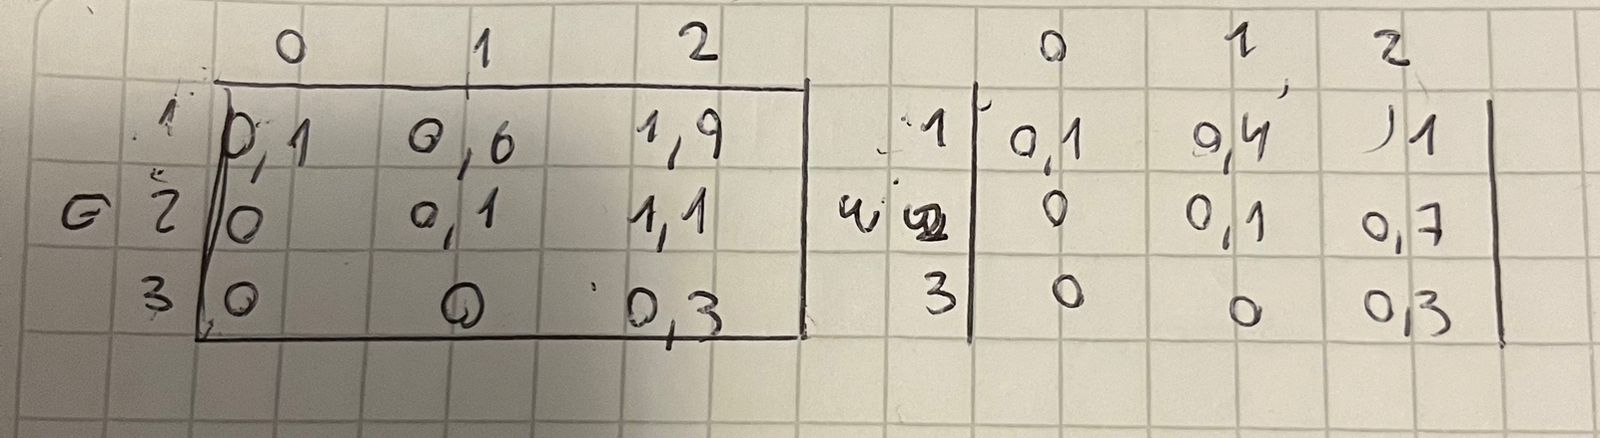

## 2.4. Ejecución del algoritmo paso a paso $(verbose = True)$

Utilizando la opción $verbose = True$, podemos ver lo que ocurre en cada iteración del algoritmo.

### Generador de instancias

In [11]:
import random
def optimal_bst_instance_generator(n):
    keys = sorted(random.sample(range(1, 100), n))
    arr = np.random.random(n*2+1)
    arr /= arr.sum()
    
    p = list(arr[:n]) # Probabilidad de las claves
    q = list(arr[n:]) # Probabilidad de las claves ficticias
    return keys, p, q

### $verbose$ algoritmo recursivo.

In [124]:
k, p, q  = optimal_bst_instance_generator(5)
print("Claves: ", k)
print("Probabilidades: ", np.around(p,2))
print("probabilidades ficticias: ", np.around(q,2))
c = recursiveOBST(p, q, len(k), cont, verbose = True)


Claves:  [12, 22, 40, 60, 64]
Probabilidades:  [0.07 0.05 0.09 0.05 0.11]
probabilidades ficticias:  [0.14 0.12 0.04 0.12 0.13 0.08]
La suma de las probabilidades es:  0.32
El costo del arbol de raiz 5 es: 0.53
El costo del arbol 0.53 < inf, se actualiza el costo optimo
El costo optimo es: 0.53


La suma de las probabilidades es:  0.49
El costo del arbol de raiz 4 es: 1.14
El costo del arbol 1.14 < inf, se actualiza el costo optimo
El costo optimo es: 1.14


La suma de las probabilidades es:  0.3
El costo del arbol de raiz 4 es: 0.55
El costo del arbol 0.55 < inf, se actualiza el costo optimo
El costo optimo es: 0.55


La suma de las probabilidades es:  0.49
El costo del arbol de raiz 5 es: 1.11
El costo del arbol 1.11 < 1.14, se actualiza el costo optimo
El costo optimo es: 1.11


La suma de las probabilidades es:  0.62
El costo del arbol de raiz 3 es: 1.78
El costo del arbol 1.78 < inf, se actualiza el costo optimo
El costo optimo es: 1.78


La suma de las probabilidades es:  0.26
El

### $verbose$ algoritmo dinámico.

In [13]:
k, p, q  = optimal_bst_instance_generator(5)
cont = [0]
q = dynamicBst(p, q, len(k), cont, verbose = True)

Calculando datos para el subarbol 1...1: 
La suma de probabilidades de w[1][1] es: 0.22
El costo mínimo del arbol de raiz e[1][1] es: 0.33

Calculando datos para el subarbol 2...2: 
La suma de probabilidades de w[2][2] es: 0.19
El costo mínimo del arbol de raiz e[2][2] es: 0.31

Calculando datos para el subarbol 3...3: 
La suma de probabilidades de w[3][3] es: 0.4
El costo mínimo del arbol de raiz e[3][3] es: 0.68

Calculando datos para el subarbol 4...4: 
La suma de probabilidades de w[4][4] es: 0.45
El costo mínimo del arbol de raiz e[4][4] es: 0.79

Calculando datos para el subarbol 5...5: 
La suma de probabilidades de w[5][5] es: 0.2
El costo mínimo del arbol de raiz e[5][5] es: 0.38

Calculando datos para el subarbol 1...2: 
La suma de probabilidades de w[1][2] es: 0.39
El costo mínimo del arbol de raiz e[1][2] es: 0.8

Calculando datos para el subarbol 2...3: 
La suma de probabilidades de w[2][3] es: 0.48
El costo mínimo del arbol de raiz e[2][3] es: 0.96

Calculando datos para e

#**3. Tiempo de ejecución**

## **Tiempo de ejecución recursivo**

El algoritmo **OBST** recursivo tiene un tiempo de ejecución $O(3^n)$

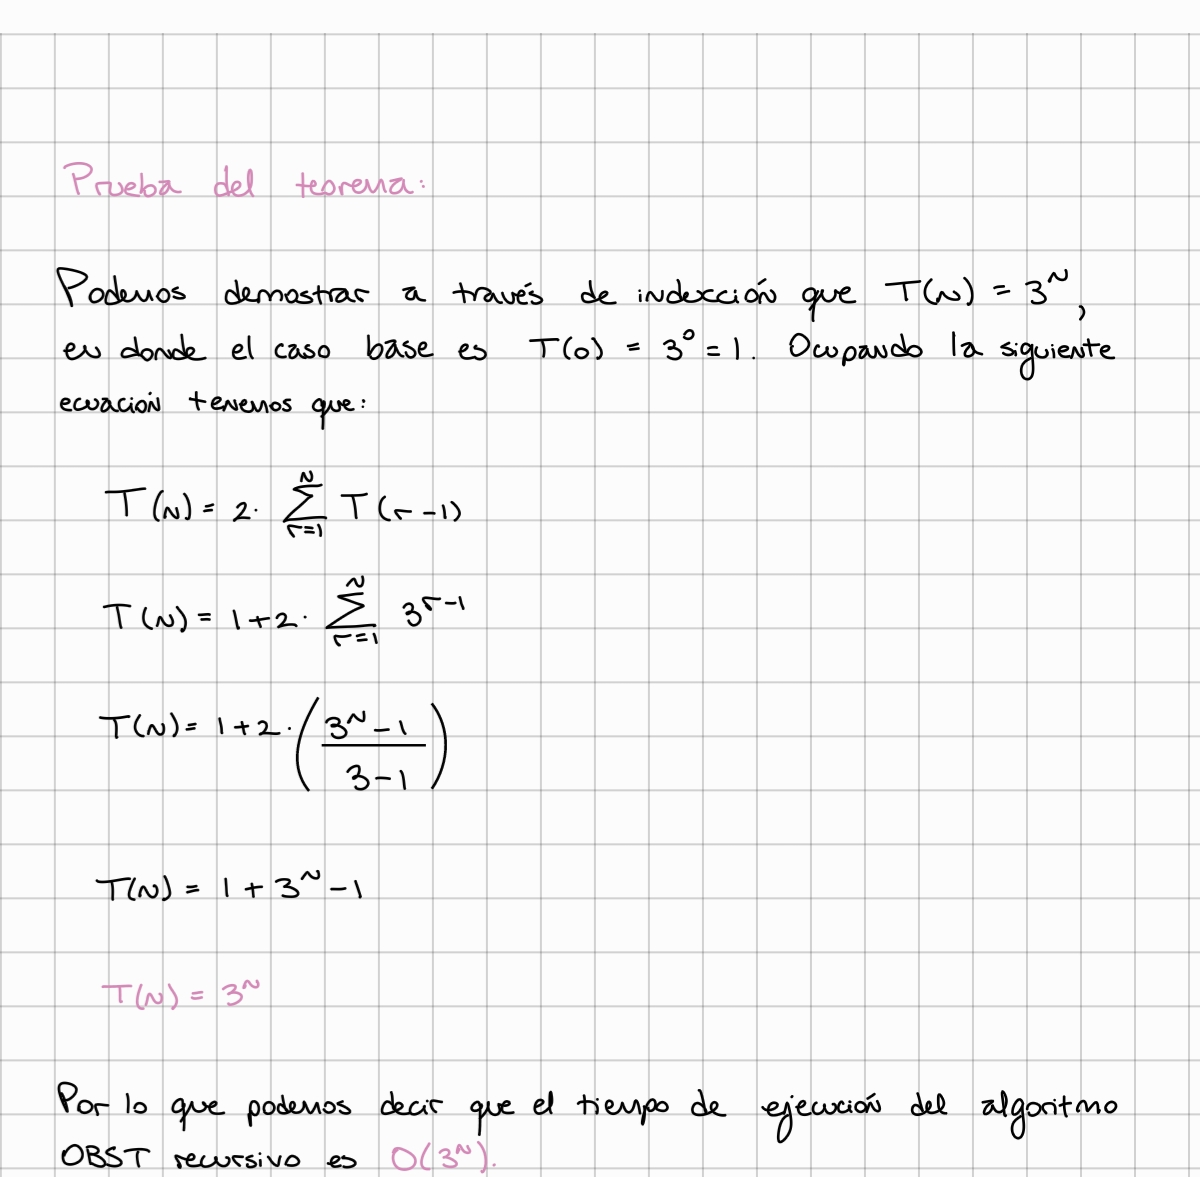


La complejidad espacial es $O(n)$, porque utiliza los mismos arreglos de entrada.

## **Tiempo de ejecución Programación Dinámica**

El algoritmo **OBST** dinámico tiene un tiempo de ejecución $O(n^3)$.

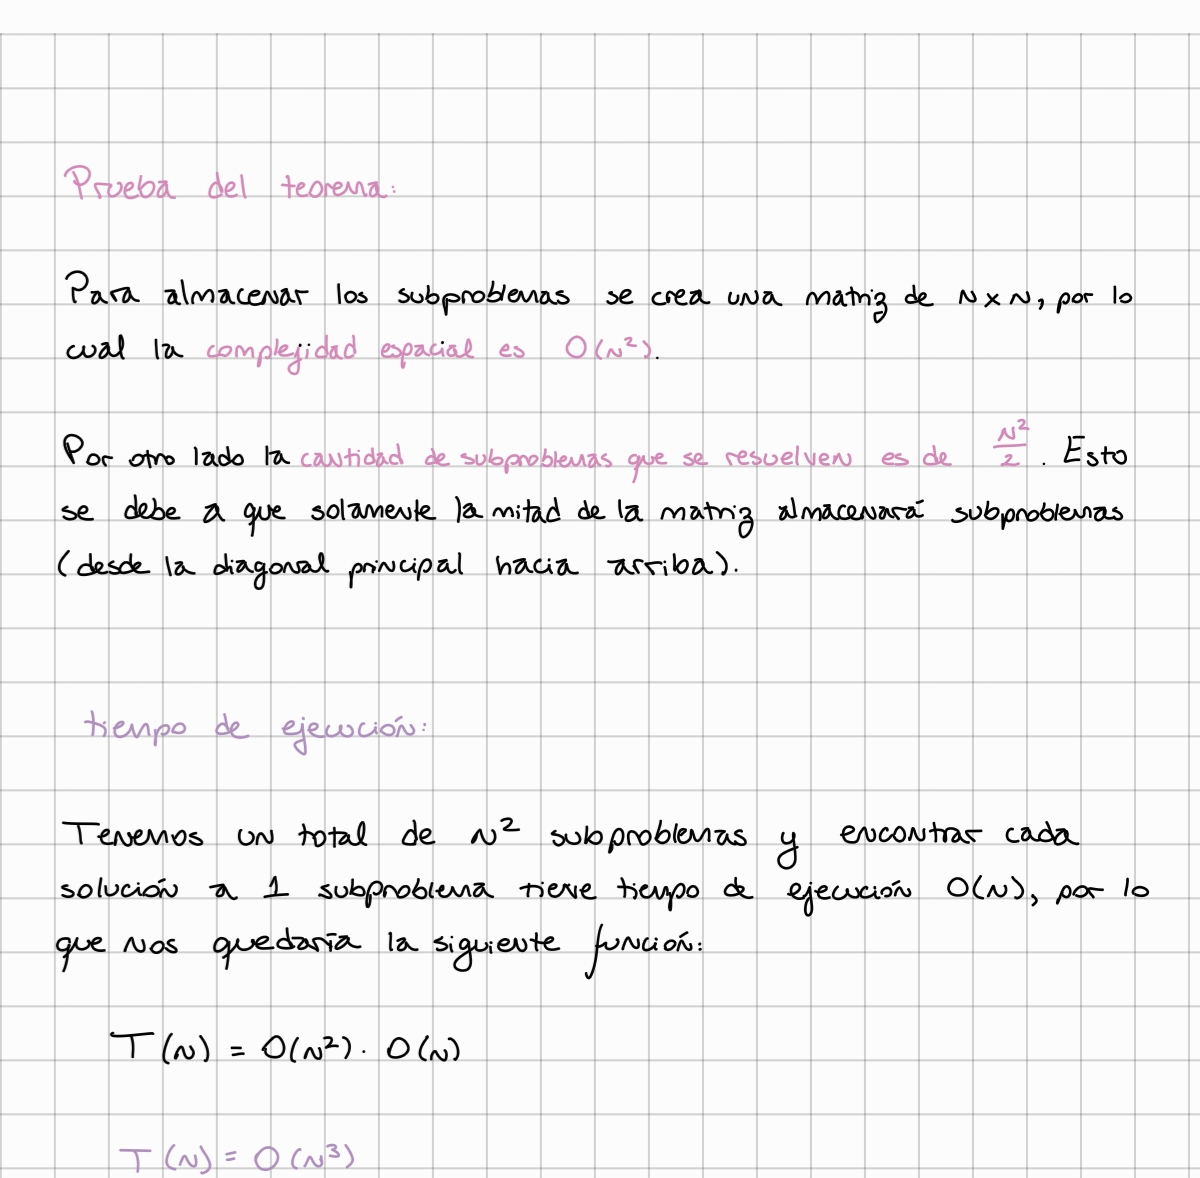

### Tiempo de ejecucion de la solucion DP

**Teorema**: $T(n) = O(n^3)$.

Observando la implementacion del algoritmo DP es facil intuir que el tiempo de ejecucion es $O(n^3)$ debido a que se basa en 3 ciclos anidados, cuyas iteraciones dependen de $n$.

El objetivo final del algoritmo es calcular $e[0, n]$ mas para esto es necesario calcular todos los subproblemas anteriores. 

La cantidad de subproblemas a resolver es $n^2 / 2$. Este valor corresponde a todas las permutaciones de los subproblemas para cada valor de $i$ y cada valor de $j$ (siendo $i$, $j$ los limites de izquierda y derecha del arreglo). 

La solucion DP se basa en la recursion de los problemas anteriores.

Se tiene un total de $n^2/2$ subproblemas y encontrar cada solucion toma una iteracion de $i$ a $j$ (cuyos valores son directamente dependientes de $n$).

# **4. Correctitud**

## Estructura óptima

Se sabe que si un BST es óptimo, luego todos sus sub-árboles $T'$ son óptimos.

Se analizan los sub-árboles para describir la subestructura óptima.

Se considera un sub-árbol $T'$ de un OBST. Para que se cumpla la propiedad de la subestructura óptima es necesario que $T'$  contenga sus llaves en un rango contiguo $k_i..k_j$.

Se elige una llave arbitraria $k_r$ (con $i \leq r \leq j$) cuya clave corresponde a la raíz de algún OBST, conteniendo las claves en dicho intervalo.

En el sub-árbol izquierdo se encuentran las llaves $k_i..k_{r-1}$. Mientras que en el sub-árbol derecho se encuentran las llaves $k_{r+1} .. k_j$. 

Para evitar problemas con el cálculo del costo. Se adopta la convención de que un árbol conteniendo las llaves $k_i..k_{i-1}$ no posee claves.

Teorema: El algoritmo obtiene el costo mínimo (y el árbol correspondiente) correctamente.

## Resolución del subproblema

Se define el subproblema de la implementación bottom up como encontrar un BST tal que este contenga las llaves en el intervalo $k_i..k_j$.

Se define $e$ como una matriz bidimensional donde se almacenarán las soluciones a los subproblemas. Luego la posición $e[i][j]$ corresponde al costo mínimo de búsqueda para un BST con las llaves $k_i..k_j$. El problema está resuelto cuando se calcula $e[0][n]$. En este punto se presentan dos posibles casos

**Caso 1**: $j < i$. En este caso el BST no tiene elementos (a excepción de una clave falsa, la cual no es considerada). 

**Caso 2**: $j\geq i$. En este caso es necesario definir la raíz arbitraria en el intervalo para recorrer todas las raíces posibles $k_r$ para las cuales se buscará
el costo mínimo de dichos BST.

Es menester considerar que en el caso de procesar un sub-árbol, al costo se le suman todas las probabilidades posibles en sí mismo. (el sub-árbol).

## Función recurrente para solucionar el problema

Para un BST de llaves $k_i..k_j$ se define la suma (acumulada) de las probabilidades como
$$
w(i,j) = \sum_{l=1}^j p_l
$$

Luego, siendo $k_r$ la raíz de un sub-árbol conteniendo las llaves $k_i..k_j$, se tiene que:

$$
e(i, j) = p_r +
e(i, r-1) + w(1, r-1) +
e(r+1, j) + w(r+1,j)
$$

Luego, se elige el árbol óptimo como aquel que provee un costo esperado de búsqueda óptimo (mínimo).

## Prueba de correctitud

Se define $l$ como la longitud del problema a resolver. Para resolver todos los subproblemas se itara desde $l=1$ hasta $l = n$.

**Teorema**: la matriz $e$ contiene el costo mínimo de los $l$ subproblemas.

**Inicio**: Antes de la primea iteración. la matriz de soluciones $e$ no tiene valores guardados.

**Mantenimiento**: Se asume que la matriz $e$ contiene la soluciones de todos los subproblemas anteriores, por lo que el subproblema actual ($l$) es resuelto correctamente.

**Finalización**: Al finalizar la última iteración de $l$, el costo mínimo del problema inicial es calculador correctamente, basándose de sus subproblemas.

# **5. Experimentos.**

## **5.1. Tiempo de ejecución (Recursivo vs Dinámico)**

En los siguientes gráficos se reporta el tiempo de ejecución del algoritmo **OBST**, para su versión dinámica y recursiva en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre $5$ y $13$. A partir de los gráficos obtenidos se realizará una comparación del rendimiento de ambas versiones.

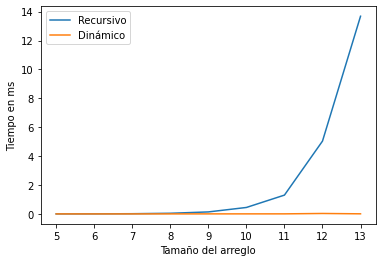

In [122]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]
y1=[]
for n in range(5,14):

  k,p,q  = optimal_bst_instance_generator(n)
  cont = [0]

  t1 = repeat(setup="from __main__ import recursiveOBST", stmt=f"recursiveOBST({p}, {q}, {n}, {cont})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamicBst", stmt=f"dynamicBst({p}, {q}, {n}, {cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Recursivo", "Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**



* Lo primero que podemos notar es la eficiencia que posee la implementación dinámica a comparación de la recursiva, esto debido al tiempo de ejecución exponencial que posee la implementación recursiva $O(3^n)$, la cual es mucho mayor a la complejidad dinámica $O(n^3)$ que crece de manera polinomial.

## **5.2. Cantidad de problemas**

En los siguientes gráficos se reportan comparaciones entre las implementaciones normales y modificadas del algoritmo OBST.

### Códigos modificados

In [97]:
import numpy

In [103]:
def modifiedOBST(p,q,n,cont):
  r = np.argmax(p) + 1
  s = sum(p[:]) + sum(q[:])
  e = optCost(p,q,1,r-1, cont) + optCost(p, q , r+1, n, cont) + s
  return e

k, p, q = optimal_bst_instance_generator(5)
cont = [0]
modifiedOBST(p,q,len(k), cont)

3.088679570251735

In [116]:
def modifiedDynamicOBST(p,q,n,cont):
  # Raiz con mayor probabilidad
  r = np.argmax(p)
  s = sum(p[:]) + sum(q[:])
  e = dynamicBst(p[:r],q[:r+1],r, cont)[0] + dynamicBst(p[:r],q[:r+1],r, cont)[0] + s
  return e
k, p, q = optimal_bst_instance_generator(5)
cont = [0]
modifiedDynamicOBST(p,q,len(k), cont)

1.2574207340958272

### Comparación de costo mínimo obtenido

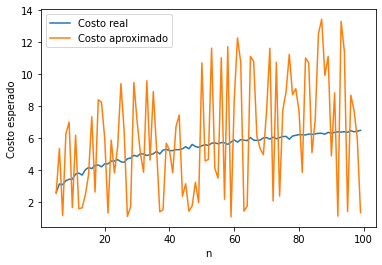

In [121]:
import matplotlib.pyplot as plt
import numpy as np

x=[]; y=[]; y1=[]

for n in range(5,100):
  k, p, q = optimal_bst_instance_generator(n)
  cont = [0]
  r, a = dynamicBst(p,q,len(k), cont)
  a = modifiedDynamicOBST(p,q,len(k), cont)

  x.append(n)
  y.append(r)
  y1.append(a)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Costo real", "Costo aproximado"])

plt.xlabel('n')
plt.ylabel('Costo esperado')
plt.show()

### Tiempo de ejecución dinámico vs dinámico modificado

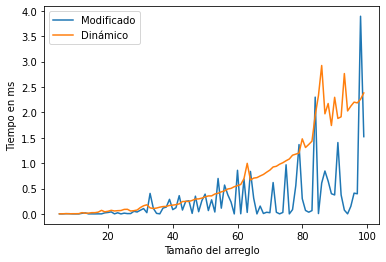

In [119]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]
y1=[]
for n in range(5,100):

  k,p,q  = optimal_bst_instance_generator(n)
  cont = [0]

  t1 = repeat(setup="from __main__ import modifiedDynamicOBST", stmt=f"modifiedDynamicOBST({p}, {q}, {n}, {cont})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import dynamicBst", stmt=f"dynamicBst({p}, {q}, {n}, {cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Modificado", "Dinámico"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### Tiempo de ejecución recursivo vs recursivo modificado

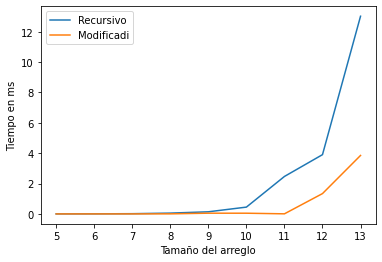

In [120]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
  
x=[]; y=[]
y1=[]
for n in range(5,14):

  k,p,q  = optimal_bst_instance_generator(n)
  cont = [0]

  t1 = repeat(setup="from __main__ import recursiveOBST", stmt=f"recursiveOBST({p}, {q}, {n}, {cont})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import modifiedOBST", stmt=f"modifiedOBST({p}, {q}, {n}, {cont})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Recursivo", "Modificadi"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

### **Análisis de resultados**

* Al ver el primer gráfico podemos notar que elegir la mayor probabilidad como raiz nos da un costo que no es muy preciso, ya que muy pocas veces esta cerca del costo real, pero de igual manera puede ser una opción para problemas de un mayor tamaño, si la precisión del costo no es muy relevante (en una situación hipotética).

* Luego, si comparamos los tiempo de ejecución entre el algoritmo dinámico y el modificado podemos notar que este por lo general es mas rapido en problemas de un mayor tamaño, por lo cual si se consigue elegir un costo un poco mas preciso este puede ser una buena opción para problemas de un mayor tamaño.

* Por otro lado al comparar el algoritmo recursivo con el dinámico, podemos notar que el modificado es mas efectivo, y que de igual manera crece de manera exponencial, pero en un menor tamaño, por lo cual para problemas de un tamaño mayor puede ser una buena alternativa.

* En conclusión los algoritmos modificados son una buena opción para problemas de un mayor tamaño, ya que nos brindan un menor tiempo de ejecución en la mayoria de los casos, no se sabe con exactitud su tiempo de ejecución, pero los graficos muestran que en su mayoria siempre son mas rapidos que los normales.